# RSI efficiency on Warsaw Stock Exchange based on WIG20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from stocks.stock import Stock
from stocks.stock_index import wig20
from analysis.rsi import rsi, rsi_cross_signals
sns.set()

## Time range of interest

In [2]:
start_date = '2019-01-01'
end_date = '2019-12-31'

time_range = pd.date_range(start_date, end_date)

## Get OHLC information, and calculate RSI and signals

In [3]:
stock_data = dict()

for ticker in wig20:
    """ create Stock instance """
    ticker_stock = Stock(ticker)
    
    """ get prices from given time range """
    map_ = ticker_stock.ohlc.index.isin(time_range)
    stock_data[ticker] = ticker_stock.ohlc[map_]
    
    """ calculate RSI using all available data """
    stock_data[ticker] = stock_data[ticker].join(rsi(ticker_stock.ohlc))
    
    """ find Buy and Sell signals """
    stock_data[ticker]['Buy'] = rsi_cross_signals(stock_data[ticker], 30, 'onrise')
    stock_data[ticker]['Sell'] = rsi_cross_signals(stock_data[ticker], 70, 'onrise')

## Extract close price changes after buy signal

In [4]:
price_change = pd.DataFrame()
  
for data in stock_data.values():
    buy_map = data['Buy']
    
    """ for each buy signal """
    for buy in data[buy_map].index:
        
        """ get close price on the day of the signal and 30 following days (31 days together) """
        price_after_buy_signal = data.loc[buy:].head(31)['Close']
        
        """ reset index and transpose to a row """
        price_after_buy_signal = price_after_buy_signal.reset_index().drop(['Date'], axis=1)
        price_after_buy_signal = price_after_buy_signal.transpose()
        
        """ collect all in one DataFrame """
        price_change = price_change.append(price_after_buy_signal, ignore_index=True)

## Calculate relative price change

In [5]:
""" calculate price change relative to the price on the day of the signal """
price_change_relative = price_change.div(price_change.loc[:,0], axis=0)
price_change_relative

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,1.012172,0.965356,0.955056,0.937266,0.951311,0.956929,0.972846,0.988764,0.969101,...,0.935581,0.921348,0.942884,0.936330,0.941948,0.947566,0.932959,0.930337,0.956929,0.965356
1,1.0,1.005906,1.022638,1.039370,1.018701,0.996063,0.966535,0.970472,0.980315,1.000984,...,0.996063,0.980709,0.977953,1.005906,1.014764,1.023622,1.037402,1.042323,1.012795,1.037402
2,1.0,0.960818,0.941227,0.920358,0.905026,0.922487,0.897359,0.876917,0.901618,0.896934,...,0.853492,0.853918,0.861584,0.879472,0.873083,0.864140,0.873083,0.922913,0.899063,0.885860
3,1.0,0.972761,0.950600,0.977378,0.972299,0.972761,0.973223,0.962142,0.950600,0.922899,...,0.936750,0.946445,1.000462,0.974608,0.960295,0.948753,0.919668,0.908126,0.939058,0.917821
4,1.0,0.994804,0.995276,0.995749,0.984412,0.972603,0.944261,0.925366,0.917808,0.954180,...,0.997166,0.982522,0.970713,0.940954,0.929145,0.960794,0.939065,0.931034,0.944733,0.916863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.0,0.955631,0.952787,0.958476,0.972127,0.964164,0.972696,0.994881,1.000569,0.978385,...,0.893629,0.857793,0.858931,0.894198,0.872014,0.856086,0.868032,0.864619,0.856086,0.841866
76,1.0,0.991808,1.000585,1.023406,1.029257,1.006437,0.965477,0.978935,0.979520,0.975424,...,0.897016,0.880632,0.892920,0.889409,0.880632,0.866004,0.873025,0.883558,0.886483,0.916910
77,1.0,0.983719,0.944271,0.945523,0.984346,0.959925,0.942392,0.955542,0.951785,0.942392,...,1.083281,1.092048,1.125861,1.129618,1.150908,1.173450,1.174076,1.180338,1.164684,1.112085
78,1.0,0.975191,0.957379,0.970738,0.966921,0.957379,0.941476,0.949109,0.960560,0.963740,...,1.169211,1.192112,1.192748,1.199109,1.183206,1.129771,1.073155,1.077608,1.094784,1.081425


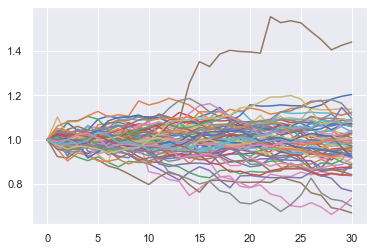

In [6]:
price_change_relative.transpose().plot(legend=False)

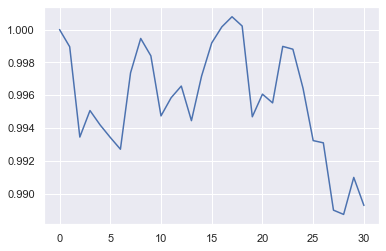

In [7]:
price_change_relative.mean(axis=0).plot(legend=False)